In [51]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [2]:
minst = fetch_openml('mnist_784', version=1)
minst.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
minst["url"]

'https://www.openml.org/d/554'

In [4]:
X,y = minst["data"] , minst["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

### Just make sure that it is in numerical format because it is in strings

In [7]:
y = y.astype(np.uint8)

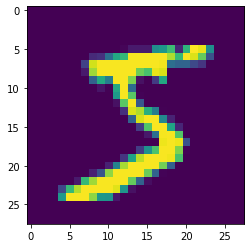

In [8]:
plt.imshow(X[0].reshape(28,28))

In [9]:
y[0]

5

## Train test split using basic sclicing 

In [10]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### SGDClassifier class. This classifier has the advantage of being capable of handling very large datasets efficiently


In [12]:
model_sgd_c = SGDClassifier(random_state=42)
model_sgd_c.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [13]:
model_sgd_c.predict([X[0]])

array([ True])

**The classifier guesses that this image represents a 5 (True). Looks like it guessed right
in this particular case! Now, let’s evaluate this model’s performance**


## Measuring Accuracy Using Cross-Validation


In [14]:
cross_sgd = cross_val_score(model_sgd_c,X_train,y_train_5,scoring="accuracy",cv=5)

In [15]:
cross_sgd

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [16]:
np.mean(cross_sgd)

0.9603333333333334

**Wow! Above 96% accuracy (ratio of correct predictions) on all cross-validation folds? 
This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very
dumb classifier that just classifies every single image in the “not-5” class**

In [17]:
np.zeros((10,1),dtype = bool)

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [18]:
class Never5classification(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    


never_5_clf = Never5classification()
np.mean(cross_val_score(never_5_clf,X_train,y_train_5,cv=5,scoring="accuracy"))

0.9096499999999998

**That’s right, it has over 90% accuracy! This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time. Beats Nostradamus**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others).**


## Confusion Matrix

In [24]:
y_train_pred = cross_val_predict(model_sgd_c,X_train,y_train_5,cv=5)

In [25]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [26]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [28]:
cm = confusion_matrix(y_train_5,y_train_pred)

In [29]:
cm

array([[53115,  1464],
       [  916,  4505]], dtype=int64)

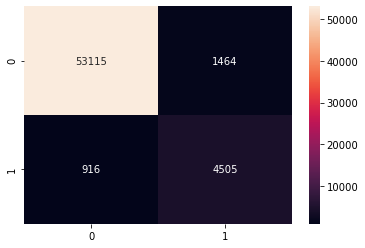

In [50]:
sns.heatmap(cm,annot=True,fmt="d")

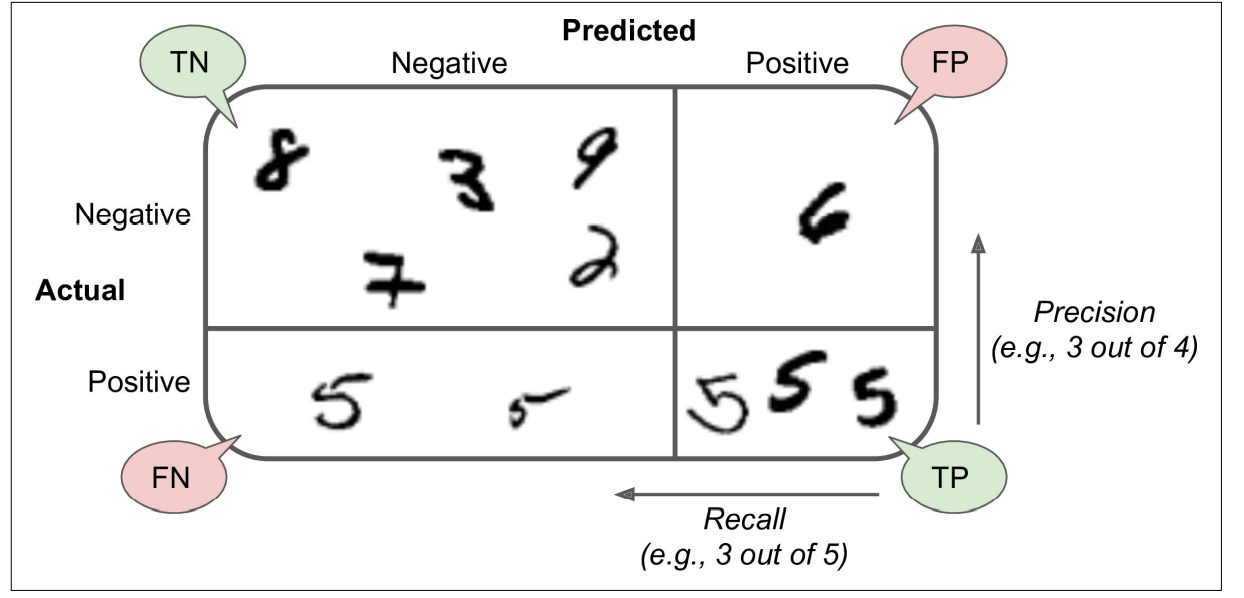

**Each row in a confusion matrix represents an actual class, while each column repre‐
sents a predicted class. The first row of this matrix considers non-5 images (the nega‐
tive class): 53,057 of them were correctly classified as non-5s (they are called true
negatives), while the remaining 1,522 were wrongly classified as 5s (false positives).
The second row considers the images of 5s (the positive class): 1,325 were wrongly
classified as non-5s (false negatives), while the remaining 4,096 were correctly classi‐
fied as 5s (true positives).**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**



**A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diago‐
nal (top left to bottom right)**

In [38]:
y_train_all_5 = y_train_5
confusion_matrix(y_train_5,y_train_all_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## precision 

**positive predictions**


**precision = TP / TP + FP**


**So precision is typically used
along with another metric named recall, also called sensitivity or true positive rate**

In [40]:
4505 / (4505 + 1464)      

0.7547327860613168

##### you can check now the precision gives you the 75% accuracy for your model when you see accuracy you can see your model is 96% so when ever you have a skewed data you need to use the differnt techinques "NOT ACCURACY"

In [42]:
5421 / 5421 + 0

1.0

## Recall

**positive instances that are correctly detected by the classifier**

**recall = TP / TP + FN**

In [46]:
4505 / (4505 + 916) 

0.8310274857037447

## Precision and Recall

In [49]:
precision = precision_score(y_train_5,y_train_pred)
recall = recall_score(y_train_5,y_train_pred)

print(f"{precision} This is precision score and {recall} This is recall score ")

0.7547327860613168 This is precision score and 0.8310274857037447 This is recall score 


### It is often convenient to combine precision and recall into a single metric called the F1 score

In [52]:
f1_score(y_train_5,y_train_pred)

0.791044776119403

**FOR SOME USE CASES YOU CAN USE PRECISION AS A SCORE FOR SOME OF THE CASES YOU CAN USE RECALL AS A SCOREUnfortunately, you can’t have it both ways: increasing precision reduces recall, and
vice versa. This is called the precision/recall tradeOFF**